In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.22


In [3]:
def build(robot):
    Box(robot,x=5,y=5,width=1,height=1,name='bob')

In [12]:
def forward(t,robot):
    robot['bob'].F=30
    
def until_blue(t,robot):
    color=robot['bob'].read_color()
    red,green,blue=color
    
    if blue>200 and green>200 and red<100:
        return True
        
def monitor(t,robot):
    robot.message=robot['bob'].read_color()

In [13]:
state_machine=StateMachine({
    'forward':[[forward,until_blue],'_end_simulation']
},first_state='forward')

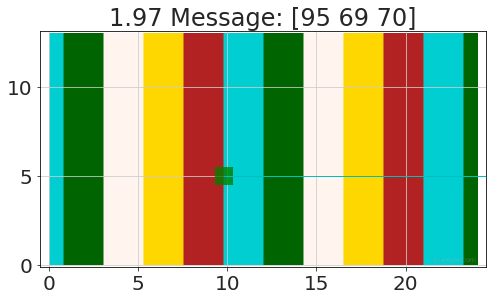

In [15]:
env=Environment(image="../images/stripes-yellow-lines-blue-red-streaks-white-green.jpg",linearDamping=20) 
robot=Robot(env)
build(robot)

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor


run_sim(env,robot.controller,
        total_time=20,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        figure_width=8,
       )    
